In [1]:
print("Merhaba, iGU - İSTKA!") # print ekrana cıktı veren bır koddur .

Merhaba, iGU - İSTKA!


In [2]:
import sys # import python proramlama dılınde yazılma kutuphane eklemeye yarayan bir kod blogudur
print (sys.version)

3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/VERIYAPILARI_ISTKA2')
! pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/VERIYAPILARI_ISTKA2


In [5]:
import os
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA2/verı_setı'

# VeriSetiYolu içindeki .csv dosyalarını bul ve say
csv_dosyaları = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]

# .csv dosya sayısını ekrana yazdır
csv_dosya_sayisi = len(csv_dosyaları)
print(f"VeriSetiYolu içerisinde {csv_dosya_sayisi} tane .csv dosyası bulunuyor.")

VeriSetiYolu içerisinde 1 tane .csv dosyası bulunuyor.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
dosya_yolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA2/verı_setı/ilcesuveriseti.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

   ID;ILCELER;2015;2016;2017;2018;2019;2020;2021;2022
0   1;ADALAR;1.432.494;1.472.276;1.366.581;1.399.1...
1   2;ARNAVUTKOY;8.002.123;9.178.953;10.176.132;11...
2   3;ATASEHIR;18.597.049;19.974.097;21.205.911;21...
3   4;AVCILAR;16.220.476;17.052.253;17.558.403;18....
4   5;BUYUKCEKMECE;9.915.435;10.788.924;11.172.787...
5   6;BAHCELIEVLER;23.610.609;24.320.533;24.868.59...
6   7;BAKIRKOY;11.510.117;11.793.169;12.509.301;15...
7   8;BAYRAMPASA;11.545.682;11.914.393;12.516.185;...
8   9;BAGCILAR;26.691.720;28.182.511;29.362.186;31...
9   10;BASAKSEHIR;16.174.934;18.100.255;19.576.095...
10  11;BEYKOZ;10.254.740;10.891.434;11.331.655;12....
11  12;BEYLIKDUZU;12.346.365;13.630.387;14.948.006...
12  13;BEYOGLU;11.167.382;11.311.755;11.420.559;12...
13  14;BESIKTAS;11.976.186;12.385.216;12.609.953;1...
14  15;ESENLER;15.854.265;16.584.976;17.162.651;17...
15  16;ESENYURT;27.933.397;32.799.007;36.083.030;3...
16  17;EYUPSULTAN;17.116.911;17.901.848;18.222.331...
17  18;FATIH;22.358.121;21.7

In [7]:
# Veri setinin yolunun gösterimi ve yüklemesi
VeriSetiYolu = '/content/drive/My Drive/VERIYAPILARI_ISTKA2/verı_setı/ilcesuveriseti.csv'
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# ; verilerini temizleyip , verisini dönüştürme işlemidir.
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

print(data.head())

   ID       ILCELER      2015      2016      2017      2018      2019  \
0   1        ADALAR   1432494   1472276   1366581   1399182   1371291   
1   2    ARNAVUTKOY   8002123   9178953  10176132  11404878  13818204   
2   3      ATASEHIR  18597049  19974097  21205911  21496185  22428468   
3   4       AVCILAR  16220476  17052253  17558403  18312736  19485453   
4   5  BUYUKCEKMECE   9915435  10788924  11172787  12222470  13606571   

       2020      2021      2022  
0   1513070   1435991   1543403  
1  15570466  17102127  18891299  
2  23737630  24281319  24377611  
3  20824893  20690506  21556002  
4  16015731  16167480  17412198  


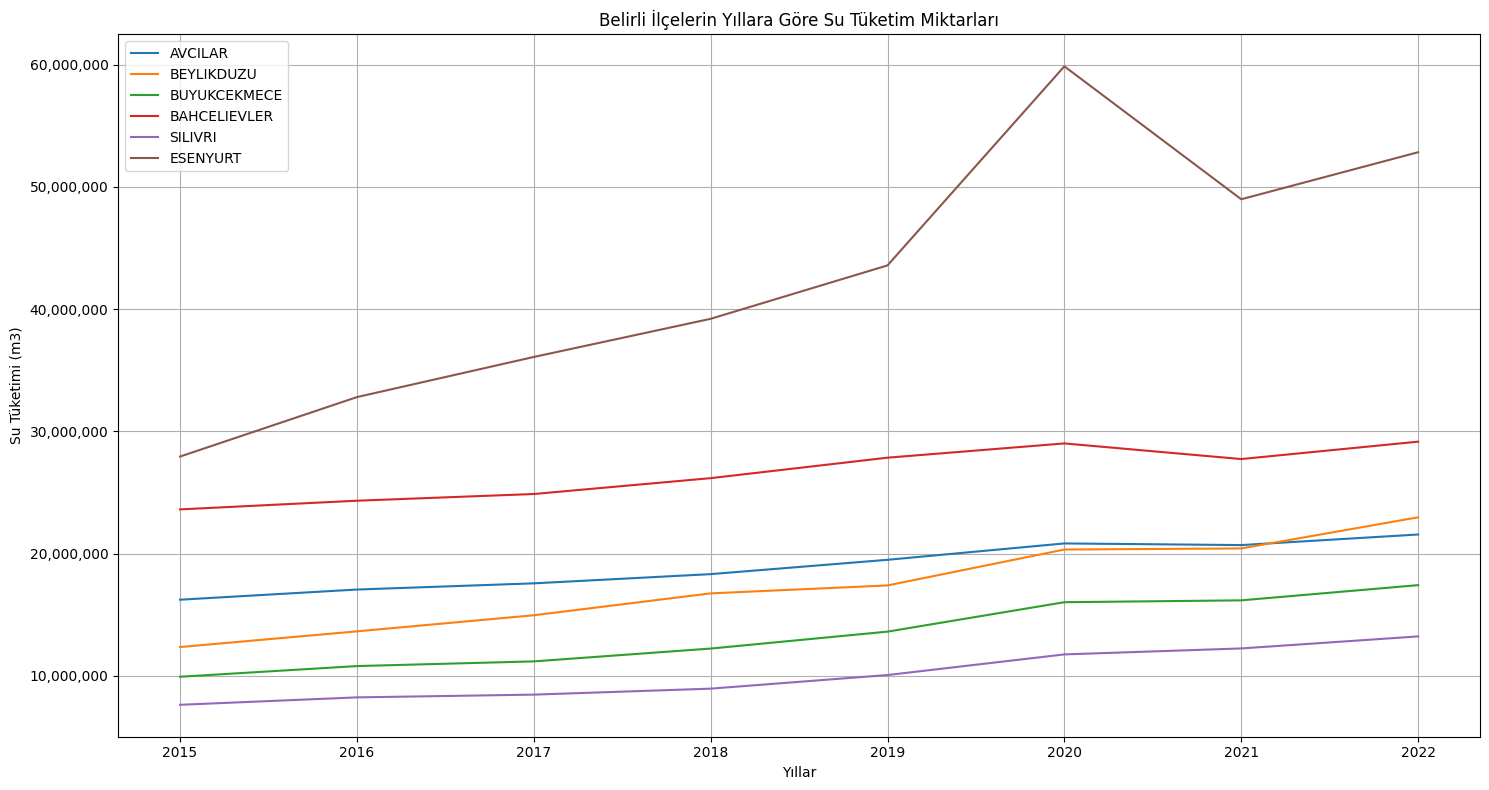

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilceler = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "BAHCELIEVLER", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilceler)]
# Seçilen ilçeler için yıllık su tüketim miktarlarını çizme
plt.figure(figsize=(15, 8))

for ilce in ilceler:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    plt.plot(data.columns[2:], ilce_data.iloc[0, 2:], label=ilce)

plt.xlabel('Yıllar')
plt.ylabel('Su Tüketimi (m3)')
plt.title('Belirli İlçelerin Yıllara Göre Su Tüketim Miktarları')

# Y eksenine binlik ayırıcı ekleme
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
!pip install plotly

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Veri setini yükleme ve temizleme
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# Sayısal kolonlardaki verileri temizleyip sayıya dönüştürme
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

# Belirtilen ilçeler için veriyi filtreleme
ilce_bilgileri = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "BAHCELIEVLER", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilce_bilgileri)]

# Plotly kullanarak interaktif grafik oluşturma
fig = go.Figure()

for ilce in ilce_bilgileri:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    fig.add_trace(go.Scatter(
         x=data.columns[2:],
         y=ilce_data.iloc[0, 2:],
         mode='lines+markers',
         line=dict(width=3),
         name=ilce
        ))

fig.update_layout(
        title='AVCILAR, BEYLIKDUZU, BUYUKCEKMECE, KUCUKCEKMECE, SILIVRI, ESENYURT İlçelerin Yıllara Göre Su Tüketim Miktarları',
        xaxis_title='Yıllar',
        yaxis_title='Su Tüketimi (m3)',
        yaxis=dict(tickformat=','),
        template='plotly_white'
)

fig.show()

In [11]:
# 1. Kabarcık (Bubble) Sıralama Algoritması

dizi =[64, 34, 90, 1]

def kabarcikalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve n değişkenine atar.
    for i in range(n):  # 2. Adım: i değişkeni 0'dan n-1'e kadar döner, bu dış döngüdür.
        for j in range(0, n-i-1):  # 3. Adım: j değişkeni, 0'dan n-i-1'e kadar döner, bu iç döngüdür.
            if dizi[j] > dizi[j+1]:  # 4. Adım: Şu anki eleman ile bir sonraki elemanı karşılaştırır.
               dizi[j], dizi[j+1] = dizi[j+1], dizi[j]  # 5. Adım: Eğer şu anki eleman bir sonrakinden büyükse, yer değiştirir.
    return dizi  # 6. Adım: Sıralanmış diziyi döner.

kabarcik_siralama = kabarcikalgoritmasi(dizi)
print("Sıralama Sonucu: ", kabarcik_siralama)

Sıralama Sonucu:  [1, 34, 64, 90]


In [12]:
# 2. Seçim (Selection) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def secimalgoritmasi(dizi):
    n = len(dizi)  # 1. Adım: Dizinin uzunluğunu alır ve 'n' değişkenine atar.
    for i in range(n):  # 2. Adım: 'i' değişkeni 0'dan n-1'e kadar döner. Bu dış döngüdür ve dizinin her öğesini sırasıyla ele alır.
        degisken = i  # 3. Adım: Şu anki döngüdeki en küçük elemanın indeksini 'degisken' olarak kabul eder. Başlangıçta 'i' indeksini alır.
        for j in range(i+1, n):  # 4. Adım: 'j' değişkeni, 'i+1'den n'e kadar döner. Bu iç döngüdür ve 'i'nin sağındaki elemanları tarar.
            if dizi[j] < dizi[degisken]:  # 5. Adım: Eğer 'dizi[j]' değeri 'dizi[degisken]' değerinden küçükse,
                degisken = j  # 6. Adım: 'degisken' güncellenir ve yeni minimum değerin bulunduğu indeks olarak atanır.
        dizi[i], dizi[degisken] = dizi[degisken], dizi[i]  # 7. Adım: 'degisken' ile 'i' indeksi arasındaki elemanlar yer değiştirilir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

# Test
secimsiralamasi = secimalgoritmasi(dizi)
print("Sıralama Sonucu:", secimsiralamasi)

Sıralama Sonucu: [1, 34, 64, 90]


In [13]:
# 3. Insertion (Eklemeli) Sıralama Algoritması

dizi = [64, 34, 90, 1]

def eklemelialgoritma(dizi):
    for i in range(1, len(dizi)):  # 1. Adım: 'i' değişkeni 1'den başlayarak dizinin sonuna kadar döner.
        degisken = dizi[i]  # 2. Adım: 'degisken' değişkeni, şu anda incelenen elemanı tutar.
        j = i-1  # 3. Adım: 'j' değişkeni, 'i' indeksinin bir öncesindeki indeksi gösterir.

        while j >= 0 and degisken < dizi[j]:  # 4. Adım: 'degisken', 'dizi[j]'den küçük olduğu sürece ve 'j' 0'dan büyük ya da eşit olduğu sürece döngü devam eder.
            dizi[j + 1] = dizi[j]  # 5. Adım: 'dizi[j]' değerini bir sağa kaydırır.
            j -= 1  # 6. Adım: 'j' indeksini bir azaltır ve döngü devam eder.

        dizi[j + 1] = degisken  # 7. Adım: 'degisken' değişkenini dizi içerisine yerleştirir.

    return dizi  # 8. Adım: Sıralanmış diziyi döner.

eklemelisiralama = eklemelialgoritma(dizi)
print("Secim Sıralaması:", eklemelisiralama)


Secim Sıralaması: [1, 34, 64, 90]


In [14]:
# 1. Doğrusal Arama Algoritması (Linear Search)

dizi = [64, 90, 34, 1]
aranacak_bilgi = int(input("Aranacak Sayıyı Girin: "))

def dogrusal_arama(dizi, aranacak_bilgi):
    for i in range(len(dizi)):
        if dizi[i] == aranacak_bilgi:
            return i  # Eleman bulundu, indeksi döndür
    return -1  # Eleman bulunamadı

sonuc = dogrusal_arama(dizi, aranacak_bilgi)

if sonuc != -1:
    print("Eleman ", aranacak_bilgi, " indeksi: ", sonuc)
else:
    print("Eleman bulunamadı...")


Aranacak Sayıyı Girin: 34
Eleman  34  indeksi:  2


In [20]:
import pandas as  pd

file_path = '/content/drive/My Drive/VERIYAPILARI_ISTKA2/verı_setı/ilcesuveriseti.csv'
df = pd.read_csv(file_path, sep=';')

# Veri seti
print(df.head())

# 2022 yılı verileri üzerinde arama yapmak için veri setini ; verisinden temizliyoruz..
arama_dizisi = df[['ILCELER', '2022']].copy()
arama_dizisi['2022'] = arama_dizisi['2022'].str.replace('.', '').astype(int)
data_array = arama_dizisi.to_numpy()

def dogrusal_arama(dizi, aranacak_bilgi):
    for i in range(len(dizi)):
        if dizi[i][1] == aranacak_bilgi:
            return i  # Eleman bulundu, indeksi döndür
    return -1  # Eleman bulunamadı

# Kullanıcıdan aranacak su tüketim miktarını alalım
aranacak_bilgi = input("Aranacak Su Tüketim Miktarını Girin (2022): ")
aranacak_bilgi = int(aranacak_bilgi.replace('.', ''))

sonuc = dogrusal_arama(data_array, aranacak_bilgi)

if sonuc != -1:
    print("Su tüketim miktarı ", aranacak_bilgi, " olan ilçe: ", data_array[sonuc][0])
else:
    print("Su tüketim miktarı bulunamadı...")

   ID       ILCELER        2015        2016        2017        2018  \
0   1        ADALAR   1.432.494   1.472.276   1.366.581   1.399.182   
1   2    ARNAVUTKOY   8.002.123   9.178.953  10.176.132  11.404.878   
2   3      ATASEHIR  18.597.049  19.974.097  21.205.911  21.496.185   
3   4       AVCILAR  16.220.476  17.052.253  17.558.403  18.312.736   
4   5  BUYUKCEKMECE   9.915.435  10.788.924  11.172.787  12.222.470   

         2019        2020        2021        2022  
0   1.371.291   1.513.070   1.435.991   1.543.403  
1  13.818.204  15.570.466  17.102.127  18.891.299  
2  22.428.468  23.737.630  24.281.319  24.377.611  
3  19.485.453  20.824.893  20.690.506  21.556.002  
4  13.606.571  16.015.731  16.167.480  17.412.198  
Aranacak Su Tüketim Miktarını Girin (2022): 21.556.002
Su tüketim miktarı  21556002  olan ilçe:  AVCILAR


In [21]:
# 2. İkili Arama Algoritması (Binary Search)

dizi = [1, 34, 64, 90]

def ikiliarama(dizi, aranacak_bilgi):
    ilk = 0
    ikinci = len(dizi) - 1 #dizi uzunluğuna bakıyoruz.

    while ilk <= ikinci:
        degisken = (ilk + ikinci) // 2  # Orta indeksi doğru şekilde hesaplar
        if dizi[degisken] == aranacak_bilgi:
            return degisken
        elif dizi[degisken] < aranacak_bilgi:
            ilk = degisken + 1
        else:
            ikinci = degisken - 1

    return -1  # Eleman bulunamadı ise

aranacak_bilgi = int(input("Aranacak Sayıyı Girin: "))

sonuc = ikiliarama(dizi, aranacak_bilgi)

if sonuc != -1:
    print("Eleman ", aranacak_bilgi, " indeksi: ", sonuc)
else:
    print("Eleman bulunamadı...")

Aranacak Sayıyı Girin: 34
Eleman  34  indeksi:  1
